# NSMC : Naver Sentiment Movie Corpus (네이버 영화 리뷰 데이터)
네이버에서 제공하는 200,000 개의 영화 리뷰 데이터
- 긍정 리뷰 : 영화 평점 9점 이상
- 부정 리뷰 : 영화 평점 4점 이하
- 5-8점의 영화 리뷰들은 제외됨
- 출처 : https://github.com/e9t/nsmc

# 모듈 불러오기

In [20]:
import re

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt, Komoran, Kkma

# 데이터 불러오기

In [2]:
data = pd.read_csv('C:/Users/Junmin/Desktop/데크캠/병아리/data/ratings.txt', sep = "\t") # 데이터 불러오기

# 데이터 확인하기

In [9]:
data.head(10)
# id : 네이버 영화 리뷰의 식별번호
# document : 네이버 영화 리뷰 내용
# label : 긍정, 부정 레이블 (긍정 : 1, 부정 : 0)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [10]:
print(data.shape) # 데이터 행과 열 개수 확인

(200000, 3)


# 결측값 확인 및 제거

In [3]:
data.isnull().sum() # 각 열별 결측치 데이터 개수 확인

id          0
document    8
label       0
dtype: int64

In [4]:
data[data['document'].isnull()] # 'document' 열의 결측치 데이터 확인

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [5]:
notnull_data = data.dropna(axis = 0) # 결측치 열 제거
notnull_data.isnull().sum() # 제거 된 결과 확인

id          0
document    0
label       0
dtype: int64

In [14]:
print(notnull_data.shape) # 결측치 열 제거 후 전체 데이터 행과 열 개수 확인 (8개 제거)

(199992, 3)


# 중복값 확인 및 제거

In [6]:
notnull_data.duplicated(subset = ['document']).sum() # 'document' 열의 중복된 데이터 개수 확인

5449

In [18]:
notnull_data[notnull_data["document"].eq("재미 더럽게없다..")] # "재미 더럽게없다.." 에 해당되는 'document' 데이터 확인

,id,document,label
102354,7345248,재미 더럽게없다..,0
179240,7125895,재미 더럽게없다..,0
196015,4609944,재미 더럽게없다..,0
199362,7427273,재미 더럽게없다..,0
199966,7405830,재미 더럽게없다..,0


In [35]:
unique_df = notnull_data.drop_duplicates(subset = ["document"]) # 'document' 열이 중복된 데이터 제거
unique_df.shape # 'document' 열이 중복된 데이터를 제거한 이후 데이터 행과 열 개수 확인 (5,449개 제거)
# 199992 - 5449 = 194543

(194543, 3)

In [43]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글, 띄어쓰기만 포함하는 정규식

a = []
for i in range(len(unique_df1)):
    a.append(hangul.sub('', unique_df1["document"][i]))

unique_df1["preprocessed_document"] = a
unique_df1.head()

,id,document,label,preprocessed_document
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화


# 영화 리뷰 데이터에 대해 문장 길이를 계산하고 시각화를 통해 데이터를 탐색

In [45]:
unique_df1["document_len"] = unique_df["preprocessed_document"].apply(lambda x: len(x)) # 'preprocessed_document' 리뷰들의 문장 길이를 계산하여 'document_len' 열로 저장

In [10]:
unique_df["document_len"] = unique_df["preprocessed_document"].apply(lambda x: len(x)) # 'preprocessed_document' 리뷰들의 문장 길이를 계산하여 'document_len' 열로 저장

C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'The Distribution of Length over the Movie Reviews')

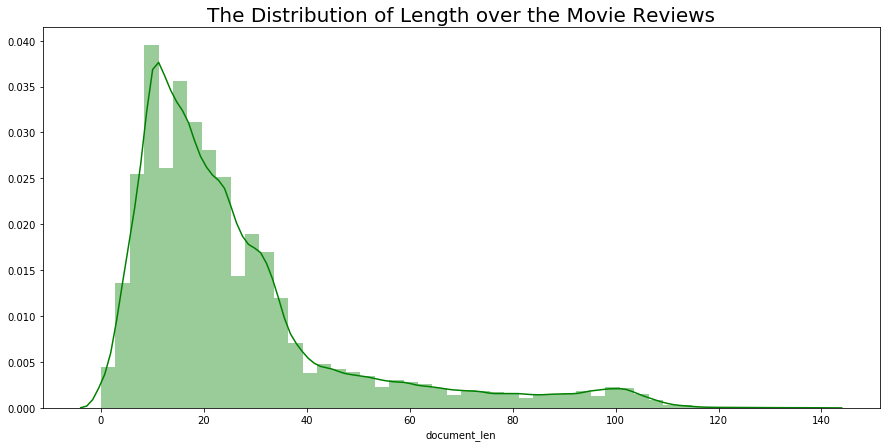

In [16]:
plt.rcParams["figure.figsize"] = (15, 7) # 그래프 크기 지정
sns.distplot(unique_df["document_len"], color = "green") # 단일 변량 분포 그래프
plt.title("The Distribution of Length over the Movie Reviews", fontsize = 20) # 그래프 제목, 글자 크기는 20 지정

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


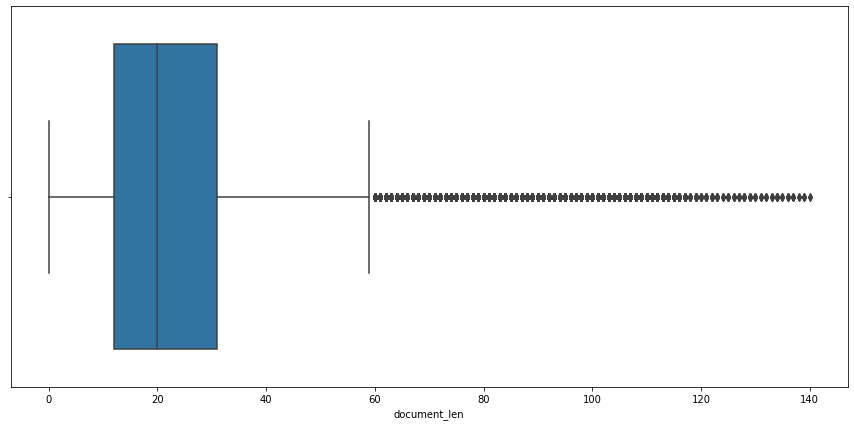

In [23]:
sns.boxplot(unique_df["document_len"]) # 'document_len' 데이터 상자 그림 그리기

In [24]:
unique_df["document_len"].describe() # 'document_len' 열의 통계량 확인 (1분위수, 3분위수)

count    194543.000000
mean         26.246557
std          21.895254
min           0.000000
25%          12.000000
50%          20.000000
75%          31.000000
max         140.000000
Name: document_len, dtype: float64

In [58]:
subset_df = unique_df1[unique_df1["document_len"] >= 10] # 'document_len' 값이 10 이상인 데이터만 추출 
subset_df = subset_df[subset_df["document_len"] <= 17] # 'document_len' 값이 17 이하인 데이터만 추출
subset_df.shape 

(53490, 5)

# 한국어 형태소 분석기 적용하기
- 문장 및 단락들을 형태소, 품사 태깅, 문장 분리 등으로 다양하게 처리해주는 한국어 형태소 분석기 Konlpy
- 출처 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [18]:
okt = Okt() # 트위터에서 만든 오픈소스 한국어 형태소 분석기

In [48]:
okt_res = subset_df["preprocessed_document"][:10].apply(lambda x: okt.morphs(x)) # 10개 영화 리뷰에 대해 트위터 형태소 분석기를 적용
okt_res # 결과 확인

0       [어릴, 때, 보고, 지금, 다시, 봐도, 재밌어요, ㅋㅋ]
6               [완전, 감동, 입니다, 다시, 봐도, 감동]
9                  [바보, 가, 아니라, 병, 쉰, 인듯]
12                [고질, 라니, 무, 귀엽다, 능, ㅋㅋ]
18    [가면, 갈수록, 더욱, 빠져, 드, 네, 요, 밀회, 화이팅]
20         [오랜, 만, 에, 본, 제대로, 된, 범죄, 스릴러]
22                  [마지막, 씬, 을, 잊을수가, 없다]
23      [강압, 적, 용서, 세뇌, 적, 용서, 에, 대한, 비판]
24            [중세시대, 명작, 굿, 평점, 이, 왜, 이래]
31             [농아인, 문화, 에, 대한, 알아야, 합니다]
Name: preprocessed_document, dtype: object

In [59]:
subset_df.index = range(len(subset_df))
subset_df.head()

,id,document,label,preprocessed_document,document_len
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,17.0
1,9279041,완전 감동입니다 다시봐도 감동,1,완전 감동입니다 다시봐도 감동,13.0
2,9250537,바보가 아니라 병 쉰 인듯,1,바보가 아니라 병 쉰 인듯,10.0
3,9537008,고질라니무 귀엽다능ㅋㅋ,1,고질라니무 귀엽다능ㅋㅋ,11.0
4,8703997,가면 갈수록 더욱 빠져드네요 밀회 화이팅!!,1,가면 갈수록 더욱 빠져드네요 밀회 화이팅,17.0


In [60]:
# 동사, 명사, 형용사, 부사만 추출
subset_df['v_n_ad'] = ''
for i in range(len(subset_df)):
    clean_words = []
    for word in okt.pos(subset_df["preprocessed_document"][i],stem=True):
        if word[1] in ['Noun', 'Verb', 'Adjective','Adverb','KoreanParticle']:
            clean_words.append(word[0])
    subset_df['v_n_ad'][i] = clean_words

C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [61]:
subset_df.head()

,id,document,label,preprocessed_document,document_len,v_n_ad
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,17.0,"[어리다, 때, 보고, 지금, 다시, 보다, 재밌다, ㅋㅋ]"
1,9279041,완전 감동입니다 다시봐도 감동,1,완전 감동입니다 다시봐도 감동,13.0,"[완전, 감동, 이다, 다시, 보다, 감동]"
2,9250537,바보가 아니라 병 쉰 인듯,1,바보가 아니라 병 쉰 인듯,10.0,"[바보, 아니다, 병, 쉰, 이다]"
3,9537008,고질라니무 귀엽다능ㅋㅋ,1,고질라니무 귀엽다능ㅋㅋ,11.0,"[고질, 무, 귀엽다, 능, ㅋㅋ]"
4,8703997,가면 갈수록 더욱 빠져드네요 밀회 화이팅!!,1,가면 갈수록 더욱 빠져드네요 밀회 화이팅,17.0,"[가면, 갈수록, 더욱, 빠지다, 드, 밀회, 화이팅]"


In [65]:
subset_df.to_csv('1차.csv', encoding='utf-8', index=False)

In [66]:
# stopwords 설정
stopword = ['중세시대', '다년', '롤라', '거더', '델과킴', '일리', '와대', 'MBC', '더빨', '크슈', '핡', '도난', '리좀', '말타', '카스', '코스',
            '야할랑',  '랑', '마테', '가희', '넝', '삼겹살', '게왜점', '조도', '로프', '스리', '넥션', '와쿠', '김영', '갠', '이아쉬', '프란', '일월', '월일',
            '내릴', '스내치', '년됫', '년됐', '헤드', '게토', '개토', '때', '이다', '보다', '아니다', '능', '무', '드', '알다', '하다', '어디서', '잇다', '알', '게', '내', 'ㄸㅗ,' 'ㅇ,' 'ㅣㅇ,' '요', '수가', '너리', '그', '따다', '재다', '간', '들다'] 

In [67]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53490 entries, 0 to 53489
Data columns (total 6 columns):
id                       53490 non-null int64
document                 53490 non-null object
label                    53490 non-null int64
preprocessed_document    53490 non-null object
document_len             53490 non-null float64
v_n_ad                   53490 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [78]:
# 빈 리스트 제거
b = []
for i in range(len(subset_df)):
    if len(subset_df['v_n_ad'][i]) == 0:
        b.append(i)
print(b)

[380, 421, 466, 509, 542, 587, 708, 744, 897, 970, 1186, 1411, 1427, 1722, 1891, 2016, 2146, 2152, 2276, 2348, 2730, 2842, 2934, 3077, 3119, 3524, 3547, 3742, 3838, 3895, 3901, 4101, 4176, 4294, 4316, 4325, 4822, 4920, 5051, 5690, 5715, 5881, 5902, 5946, 5972, 5995, 6038, 6165, 6656, 6668, 7113, 7416, 7591, 7630, 7661, 7750, 7880, 7881, 7909, 8339, 8541, 8672, 9338, 9372, 9419, 9442, 9592, 10032, 10047, 10403, 10574, 10634, 10996, 11133, 11173, 11286, 11397, 11534, 11558, 11994, 12121, 12125, 12618, 12701, 12771, 13180, 13255, 13280, 13299, 13319, 13360, 13519, 13691, 13804, 13861, 14324, 14470, 14576, 14811, 14869, 14905, 14908, 15274, 15347, 15588, 15686, 15707, 15911, 16068, 16231, 16357, 16361, 16444, 16511, 16614, 16641, 16821, 16909, 17012, 17033, 17188, 17559, 17660, 18130, 18252, 18256, 18484, 18648, 18721, 18923, 19101, 19568, 19620, 19633, 19992, 20879, 20973, 21075, 21076, 21104, 21235, 21288, 21405, 21466, 21650, 21853, 22003, 22489, 22679, 22717, 22718, 22856, 22946, 23088

In [80]:
# 빈 리스트 제거
subset_df = subset_df[~subset_df.index.isin(b)]

In [82]:
# 빈 리스트 확인
subset_df.index = range(len(subset_df))
c= []
for i in range(len(subset_df)):
    if len(subset_df['v_n_ad'][i]) == 0:
        c.append(i)
print(c)

[]


In [86]:
# stopword 제거
subset_df1 = subset_df.copy()
result = []

for i in range(len(subset_df1)):
    result = []
    for j in subset_df1['v_n_ad'][i]:
        if j not in stopword:
            result.append(j)
    subset_df1['v_n_ad'][i] = result
    
subset_df1.head()

C:\Users\Junmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,document,label,preprocessed_document,document_len,v_n_ad
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,17.0,"[어리다, 보고, 지금, 다시, 재밌다, ㅋㅋ]"
1,9279041,완전 감동입니다 다시봐도 감동,1,완전 감동입니다 다시봐도 감동,13.0,"[완전, 감동, 다시, 감동]"
2,9250537,바보가 아니라 병 쉰 인듯,1,바보가 아니라 병 쉰 인듯,10.0,"[바보, 병, 쉰]"
3,9537008,고질라니무 귀엽다능ㅋㅋ,1,고질라니무 귀엽다능ㅋㅋ,11.0,"[고질, 귀엽다, ㅋㅋ]"
4,8703997,가면 갈수록 더욱 빠져드네요 밀회 화이팅!!,1,가면 갈수록 더욱 빠져드네요 밀회 화이팅,17.0,"[가면, 갈수록, 더욱, 빠지다, 밀회, 화이팅]"


In [89]:
# 빈리스트 제거
c= []
for i in range(len(subset_df1)):
    if len(subset_df1['v_n_ad'][i]) == 0:
        c.append(i)
print(c)

[]


In [88]:
subset_df1 = subset_df1[~subset_df1.index.isin(c)]
subset_df1.index = range(len(subset_df1))

In [91]:
subset_df1.to_csv('2차.csv', index=False, encoding='utf-8')